In [137]:
from ucimlrepo import fetch_ucirepo 
  
adult = fetch_ucirepo(id=2) 
  
X = adult.data.features 
y = adult.data.targets 
  
print(adult.metadata) 
  
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [138]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [141]:

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer

In [142]:
imputed_columns = ['workclass', 'occupation', 'native-country']
imputer = make_column_transformer(
    (SimpleImputer(strategy='constant', fill_value='missing'), imputed_columns),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [143]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [144]:
X = pd.DataFrame(imputer.fit_transform(X), columns=imputer.get_feature_names_out()).convert_dtypes(convert_string=False)


In [145]:
X.duplicated().sum()

np.int64(53)

In [146]:
X['education'].value_counts()


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [147]:
X['education-num'].value_counts()


education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: Int64

In [ ]:
X.drop('education', axis=1, inplace=True)

In [149]:
def labelEnc(feat:str)->list:
    uniques = dict(zip(list(X[feat].unique()), list(range(len(X[feat].unique())+1))))
    print(uniques)
    newlist = list(map(lambda x: uniques[x],X[feat] ))
    return newlist

In [150]:
for i in X.columns:
    if X[i].dtype =='object':
        X[i] = labelEnc(i)

{'State-gov': 0, 'Self-emp-not-inc': 1, 'Private': 2, 'Federal-gov': 3, 'Local-gov': 4, '?': 5, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8, 'missing': 9}
{'Adm-clerical': 0, 'Exec-managerial': 1, 'Handlers-cleaners': 2, 'Prof-specialty': 3, 'Other-service': 4, 'Sales': 5, 'Craft-repair': 6, 'Transport-moving': 7, 'Farming-fishing': 8, 'Machine-op-inspct': 9, 'Tech-support': 10, '?': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14, 'missing': 15}
{'United-States': 0, 'Cuba': 1, 'Jamaica': 2, 'India': 3, '?': 4, 'Mexico': 5, 'South': 6, 'Puerto-Rico': 7, 'Honduras': 8, 'England': 9, 'Canada': 10, 'Germany': 11, 'Iran': 12, 'Philippines': 13, 'Italy': 14, 'Poland': 15, 'Columbia': 16, 'Cambodia': 17, 'Thailand': 18, 'Ecuador': 19, 'Laos': 20, 'Taiwan': 21, 'Haiti': 22, 'Portugal': 23, 'Dominican-Republic': 24, 'El-Salvador': 25, 'France': 26, 'Guatemala': 27, 'China': 28, 'Japan': 29, 'Yugoslavia': 30, 'Peru': 31, 'Outlying-US(Guam-USVI-etc)': 32, 'Scotlan

In [151]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
scaled_df= scaler.fit_transform(X)

In [152]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1,15):
    KM = KMeans(n_clusters=i, init='k-means++', n_init='auto')
    KM.fit(scaled_df)
    wcss.append(KM.inertia_)

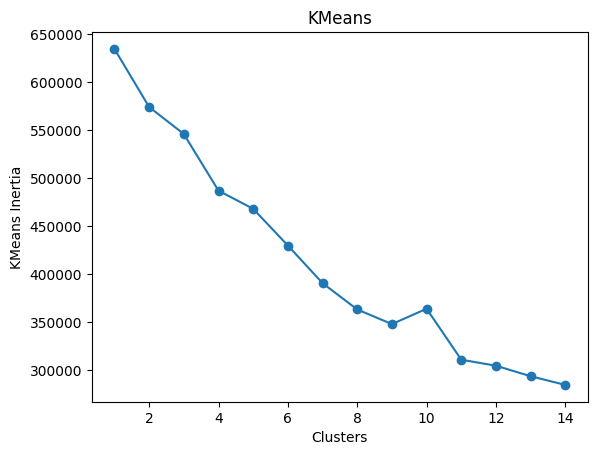

In [153]:
plt.title('KMeans')
plt.plot(range(1,15), wcss, marker='o')
plt.xlabel('Clusters')
plt.ylabel('KMeans Inertia')
plt.show()

In [154]:
Kmeans_pca = KMeans(n_clusters=3, init='k-means++', n_init='auto')

clusters = Kmeans_pca.fit_predict(scaled_df)

In [155]:
df_pc = pd.DataFrame(scaled_df,columns=[f'Component{i}'for i in range(1,14)])
df_pc.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13
0,-1.592708,-1.329045,-0.253813,0.025996,-1.061979,1.136512,-0.862008,-1.068464,-0.352026,-0.70422,0.146932,-0.217127,-0.034087
1,-0.926449,-1.050250,-0.253813,0.828308,-1.007104,1.136512,-0.066757,-0.374050,-0.352026,-0.70422,-0.144804,-0.217127,-2.213032
2,-0.260190,-0.771455,-0.253813,-0.046942,0.246034,-0.419335,0.728494,-1.068464,-0.352026,-0.70422,-0.144804,-0.217127,-0.034087
3,-0.260190,-0.771455,-0.253813,1.047121,0.426663,-1.197259,-0.066757,-0.374050,1.246343,-0.70422,-0.144804,-0.217127,-0.034087
4,-0.260190,-0.492660,-0.083137,-0.776316,1.408530,1.136512,-0.066757,0.320364,1.246343,1.42001,-0.144804,-0.217127,-0.034087


In [161]:
df = pd.concat([pd.DataFrame(scaled_df, columns=X.columns), df_pc], axis=1)


In [162]:
df['cluster'] = clusters

In [163]:
df.head()

,workclass,occupation,native-country,age,fnlwgt,education-num,marital-status,relationship,race,sex,...,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,cluster
0,-1.592708,-1.329045,-0.253813,0.025996,-1.061979,1.136512,-0.862008,-1.068464,-0.352026,-0.70422,...,-1.061979,1.136512,-0.862008,-1.068464,-0.352026,-0.70422,0.146932,-0.217127,-0.034087,2
1,-0.926449,-1.050250,-0.253813,0.828308,-1.007104,1.136512,-0.066757,-0.374050,-0.352026,-0.70422,...,-1.007104,1.136512,-0.066757,-0.374050,-0.352026,-0.70422,-0.144804,-0.217127,-2.213032,2
2,-0.260190,-0.771455,-0.253813,-0.046942,0.246034,-0.419335,0.728494,-1.068464,-0.352026,-0.70422,...,0.246034,-0.419335,0.728494,-1.068464,-0.352026,-0.70422,-0.144804,-0.217127,-0.034087,2
3,-0.260190,-0.771455,-0.253813,1.047121,0.426663,-1.197259,-0.066757,-0.374050,1.246343,-0.70422,...,0.426663,-1.197259,-0.066757,-0.374050,1.246343,-0.70422,-0.144804,-0.217127,-0.034087,2
4,-0.260190,-0.492660,-0.083137,-0.776316,1.408530,1.136512,-0.066757,0.320364,1.246343,1.42001,...,1.408530,1.136512,-0.066757,0.320364,1.246343,1.42001,-0.144804,-0.217127,-0.034087,0


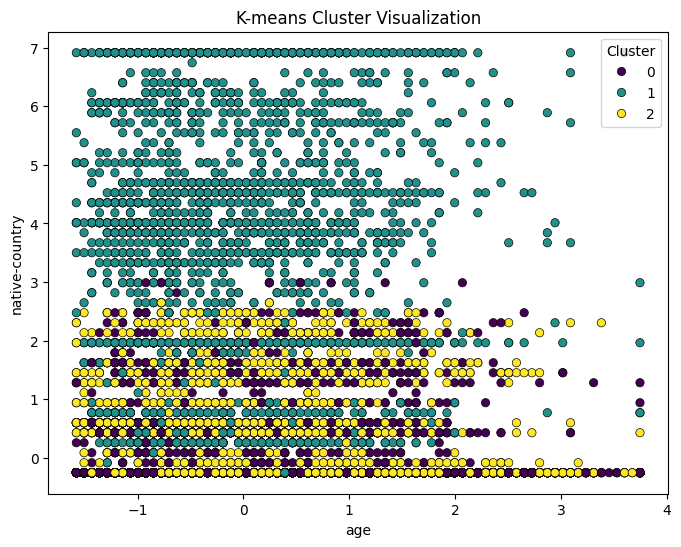

In [169]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["age"],y=df["native-country"],hue=df["cluster"],palette="viridis",edgecolor="black")
plt.title("K-means Cluster Visualization")
plt.legend(title="Cluster")
plt.show()

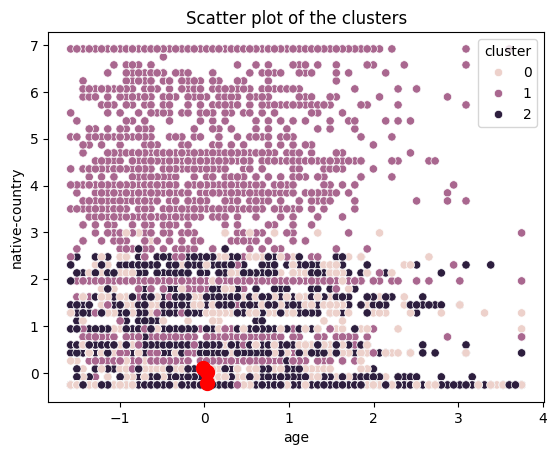

In [168]:
sns.scatterplot(data=df, x='age', y='native-country', hue='cluster', )
plt.title('Scatter plot of the clusters')
plt.scatter(Kmeans_pca.cluster_centers_[:, 0], Kmeans_pca.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [166]:
df.head()

,workclass,occupation,native-country,age,fnlwgt,education-num,marital-status,relationship,race,sex,...,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,cluster
0,-1.592708,-1.329045,-0.253813,0.025996,-1.061979,1.136512,-0.862008,-1.068464,-0.352026,-0.70422,...,-1.061979,1.136512,-0.862008,-1.068464,-0.352026,-0.70422,0.146932,-0.217127,-0.034087,2
1,-0.926449,-1.050250,-0.253813,0.828308,-1.007104,1.136512,-0.066757,-0.374050,-0.352026,-0.70422,...,-1.007104,1.136512,-0.066757,-0.374050,-0.352026,-0.70422,-0.144804,-0.217127,-2.213032,2
2,-0.260190,-0.771455,-0.253813,-0.046942,0.246034,-0.419335,0.728494,-1.068464,-0.352026,-0.70422,...,0.246034,-0.419335,0.728494,-1.068464,-0.352026,-0.70422,-0.144804,-0.217127,-0.034087,2
3,-0.260190,-0.771455,-0.253813,1.047121,0.426663,-1.197259,-0.066757,-0.374050,1.246343,-0.70422,...,0.426663,-1.197259,-0.066757,-0.374050,1.246343,-0.70422,-0.144804,-0.217127,-0.034087,2
4,-0.260190,-0.492660,-0.083137,-0.776316,1.408530,1.136512,-0.066757,0.320364,1.246343,1.42001,...,1.408530,1.136512,-0.066757,0.320364,1.246343,1.42001,-0.144804,-0.217127,-0.034087,0


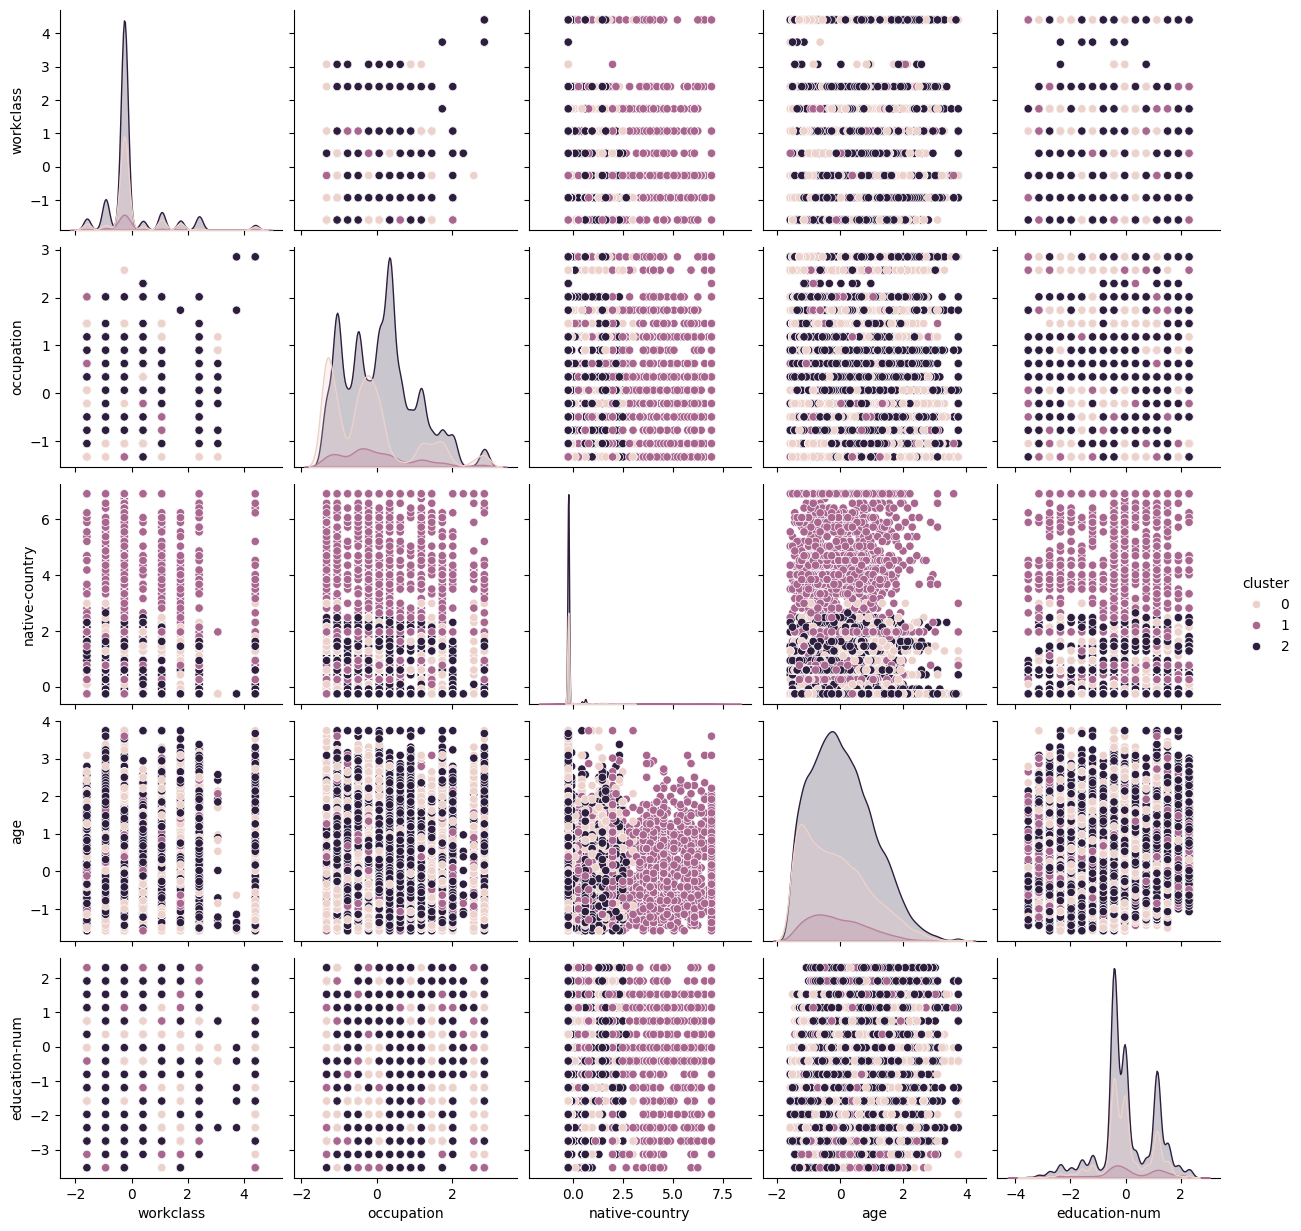

In [167]:
to_plot = ['workclass' ,'occupation', 'native-country', 'age', 'education-num','cluster']
sns.pairplot(df[to_plot], hue="cluster" )
plt.show()